In [1]:
import pandas as pd
result_df = pd.read_csv("domainadaptationexperiments.csv")
result_df = result_df.dropna()
display(result_df)

,source_train_dataset,target_train_dataset,training_method,test_dataset,adaptation_state,test_region_type,test_abs_rel,test_sq_rel,test_log10,test_rmse,test_rmse_log,test_a1,test_a2,test_a3
0,KITTI,DDAD,SCDepth,KITTI,before_adaptation,full,0.115,0.742,0.050,4.555,0.183,0.872,0.963,0.985
1,KITTI,DDAD,SCDepth,KITTI,before_adaptation,dynamic,0.191,2.072,0.084,7.111,0.282,0.726,0.891,0.949
2,KITTI,DDAD,SCDepth,KITTI,before_adaptation,static,0.106,0.638,0.046,4.275,0.159,0.886,0.973,0.991
3,KITTI,DDAD,SCDepth,DDAD,before_adaptation,full,0.222,4.843,0.109,21.075,0.366,0.628,0.842,0.917
4,KITTI,DDAD,SCDepth,DDAD,before_adaptation,dynamic,0.227,5.795,0.112,19.942,0.348,0.621,0.826,0.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,DDAD,KITTI,BOFedSCDepth,KITTI,before_adaptation,dynamic,0.396,5.569,0.143,9.836,0.396,0.438,0.727,0.881
62,DDAD,KITTI,BOFedSCDepth,KITTI,before_adaptation,static,0.306,2.874,0.119,7.266,0.341,0.496,0.811,0.942
63,DDAD,KITTI,BOFedSCDepth,DDAD,before_adaptation,full,0.215,5.412,0.113,22.755,0.381,0.615,0.827,0.906
64,DDAD,KITTI,BOFedSCDepth,DDAD,before_adaptation,dynamic,0.272,7.901,0.137,22.914,0.403,0.519,0.748,0.863


In [2]:
import pandas as pd

# Assuming result_df is your input DataFrame
metrics = ['test_abs_rel', 'test_sq_rel', 'test_log10', 'test_rmse', 'test_rmse_log', 'test_a1', 'test_a2', 'test_a3']

# Function to compute the differences between metrics for each group
def compute_metric_differences(group):
    before_adaptation_group = group[group['adaptation_state'] == 'before_adaptation']
    before_adaptation_row = {metric: None for metric in metrics}
    if len(before_adaptation_group) > 0:
        before_adaptation_row = before_adaptation_group.iloc[0]
    after_adaptation_group = group[group['adaptation_state'] == 'after_adaptation']
    after_adaptation_row = {metric: None for metric in metrics}
    if len(after_adaptation_group) > 0:
        after_adaptation_row = after_adaptation_group.iloc[0]
    differences = {}
    for metric in metrics:
        differences[metric] = None
        if before_adaptation_row[metric] and after_adaptation_row[metric]:
            differences[metric] = (before_adaptation_row[metric] - after_adaptation_row[metric]) / before_adaptation_row[metric]
    return pd.Series(differences)

# Grouping by the specified columns and applying the function to compute differences
result_change_df = result_df.groupby(['source_train_dataset', 'target_train_dataset', 'training_method', 'test_dataset', 'test_region_type']).apply(compute_metric_differences).reset_index()

# Renaming columns for clarity
result_change_df.columns = ['source_train_dataset', 'target_train_dataset', 'training_method', 'test_dataset', 'test_region_type', 'test_abs_rel_diff_prop', 'test_sq_rel_diff_prop', 'test_log10_diff_prop', 'test_rmse_diff_prop', 'test_rmse_log_diff_prop', 'test_a1_diff_prop', 'test_a2_diff_prop', 'test_a3_diff_prop']

# Dropping NaNs
result_change_df = result_change_df.dropna()

# Displaying the resulting DataFrame
display(result_change_df)

,source_train_dataset,target_train_dataset,training_method,test_dataset,test_region_type,test_abs_rel_diff_prop,test_sq_rel_diff_prop,test_log10_diff_prop,test_rmse_diff_prop,test_rmse_log_diff_prop,test_a1_diff_prop,test_a2_diff_prop,test_a3_diff_prop
6,DDAD,KITTI,FedSCDepth,DDAD,dynamic,0.327635,0.458308,0.404040,0.234542,0.347197,-0.505051,-0.344942,-0.200535
7,DDAD,KITTI,FedSCDepth,DDAD,full,0.412088,0.425285,0.532751,0.173622,0.505391,-0.481651,-0.364668,-0.306152
8,DDAD,KITTI,FedSCDepth,DDAD,static,0.431937,0.469137,0.538136,0.175246,0.509908,-0.492991,-0.384106,-0.327007
9,DDAD,KITTI,FedSCDepth,KITTI,dynamic,-0.066986,0.378168,0.041667,0.548234,0.013201,-0.027108,0.002299,0.005308
10,DDAD,KITTI,FedSCDepth,KITTI,full,0.206667,0.757853,0.291667,0.729636,0.295455,-0.094937,-0.054765,-0.030335
11,DDAD,KITTI,FedSCDepth,KITTI,static,0.258503,0.803131,0.352113,0.751604,0.386100,-0.108040,-0.069079,-0.037657
12,DDAD,KITTI,SCDepth,DDAD,dynamic,-0.054299,-0.265987,-0.187500,-0.213140,-0.178451,0.082443,0.061155,0.038825
13,DDAD,KITTI,SCDepth,DDAD,full,-0.578947,-0.660437,-0.735294,-0.376327,-0.574297,0.256927,0.108460,0.064182
14,DDAD,KITTI,SCDepth,DDAD,static,-0.668919,-0.747221,-0.848485,-0.398378,-0.648760,0.281796,0.122294,0.072389
15,DDAD,KITTI,SCDepth,KITTI,dynamic,0.512821,0.706653,0.410596,0.383156,0.302600,-0.620930,-0.251429,-0.090173


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_diff_prop(df, region_type, source_train_dataset, target_train_dataset):
    # Plotting using Seaborn
    melted_df = pd.melt(df, id_vars=['training_method'], var_name='metric', value_name='value')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='metric', y='value', hue='training_method', data=melted_df, palette='Set2')
    plt.title(f'Difference Proportions Across Test Metrics by Training Method for {region_type} regions in {source_train_dataset} to {target_train_dataset} Domain Adaptation Experiment')
    plt.xlabel('Metric')
    plt.ylabel('Difference Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Training Method', loc='upper right')
    plt.show()

,training_method,Abs Rel (DDAD),Abs Rel (KITTI),SqRel (DDAD),SqRel (KITTI),Log10 (DDAD),Log10 (KITTI),RMSE (DDAD),RMSE (KITTI),RMSELog (DDAD),RMSELog (KITTI),A1 (DDAD),A1 (KITTI),A2 (DDAD),A2 (KITTI),A3 (DDAD),A3 (KITTI)
0,FedSCDepth,0.327635,-0.066986,0.458308,0.378168,0.40404,0.041667,0.234542,0.548234,0.347197,0.013201,-0.505051,-0.027108,-0.344942,0.002299,-0.200535,0.005308
1,SCDepth,-0.054299,0.512821,-0.265987,0.706653,-0.18750,0.410596,-0.213140,0.383156,-0.178451,0.302600,0.082443,-0.620930,0.061155,-0.251429,0.038825,-0.090173


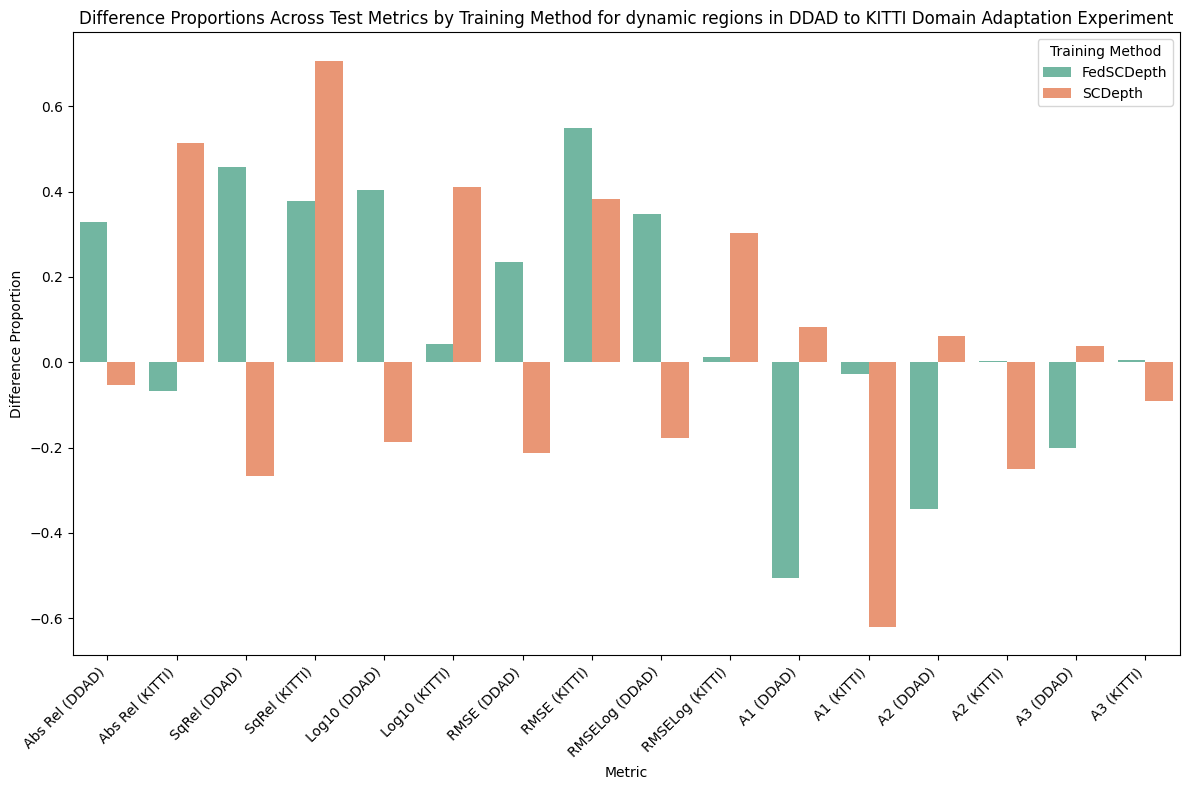

,training_method,Abs Rel (DDAD),Abs Rel (KITTI),SqRel (DDAD),SqRel (KITTI),Log10 (DDAD),Log10 (KITTI),RMSE (DDAD),RMSE (KITTI),RMSELog (DDAD),RMSELog (KITTI),A1 (DDAD),A1 (KITTI),A2 (DDAD),A2 (KITTI),A3 (DDAD),A3 (KITTI)
0,FedSCDepth,0.412088,0.206667,0.425285,0.757853,0.532751,0.291667,0.173622,0.729636,0.505391,0.295455,-0.481651,-0.094937,-0.364668,-0.054765,-0.306152,-0.030335
1,SCDepth,-0.578947,0.651515,-0.660437,0.827555,-0.735294,0.585366,-0.376327,0.511647,-0.574297,0.493188,0.256927,-0.692759,0.108460,-0.207026,0.064182,-0.067245


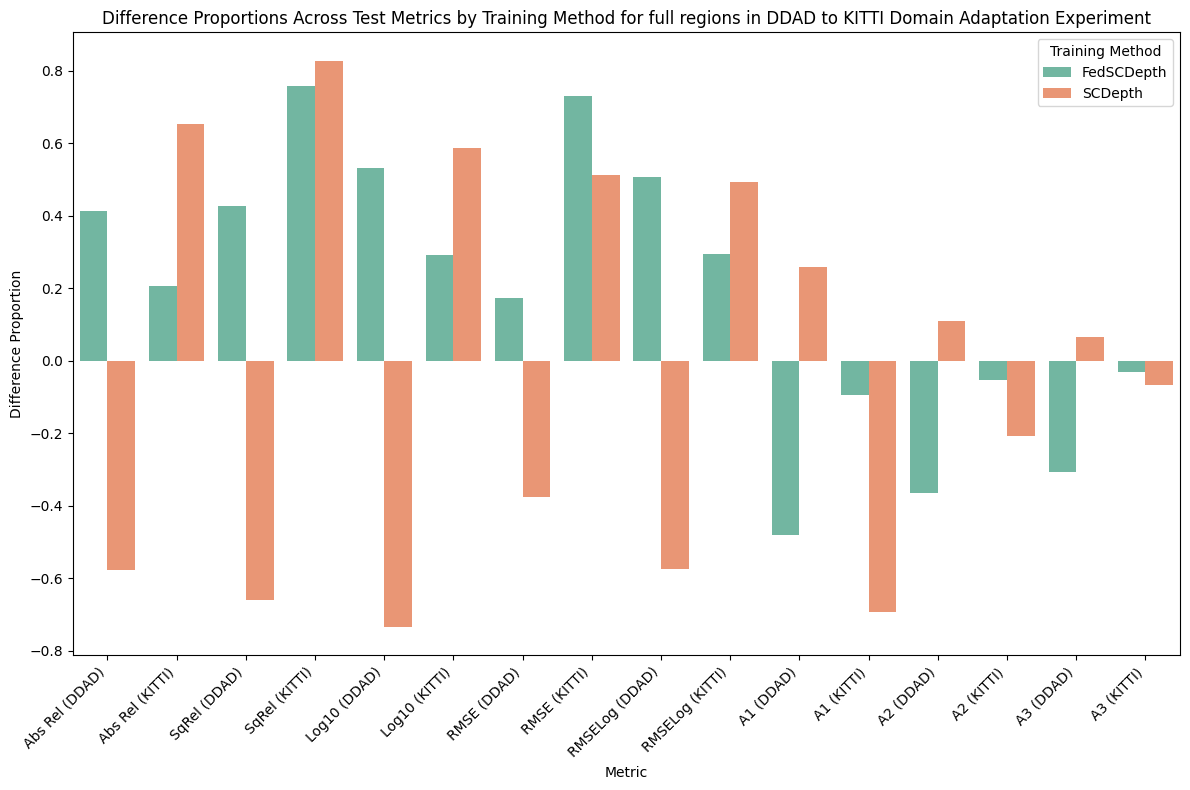

,training_method,Abs Rel (DDAD),Abs Rel (KITTI),SqRel (DDAD),SqRel (KITTI),Log10 (DDAD),Log10 (KITTI),RMSE (DDAD),RMSE (KITTI),RMSELog (DDAD),RMSELog (KITTI),A1 (DDAD),A1 (KITTI),A2 (DDAD),A2 (KITTI),A3 (DDAD),A3 (KITTI)
0,FedSCDepth,0.431937,0.258503,0.469137,0.803131,0.538136,0.352113,0.175246,0.751604,0.509908,0.38610,-0.492991,-0.108040,-0.384106,-0.069079,-0.327007,-0.037657
1,SCDepth,-0.668919,0.671779,-0.747221,0.850276,-0.848485,0.619835,-0.398378,0.535249,-0.648760,0.54902,0.281796,-0.726916,0.122294,-0.210461,0.072389,-0.067888


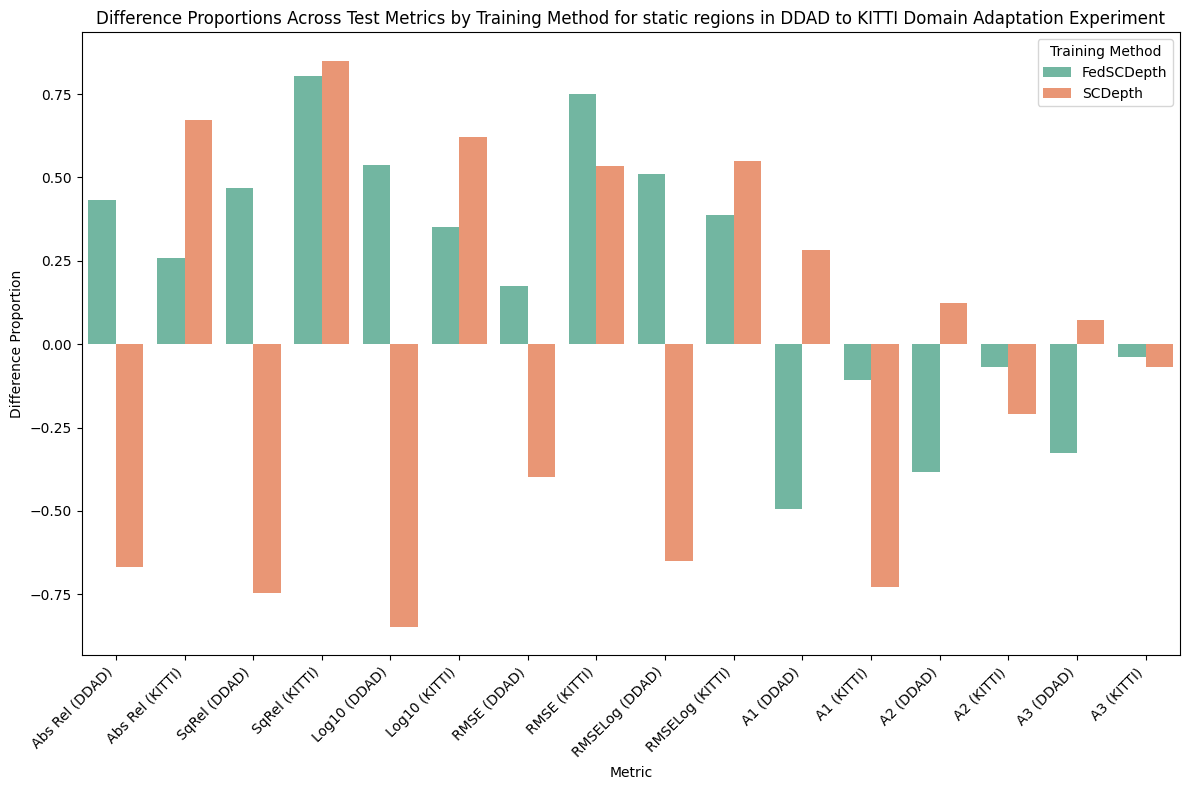

,training_method,Abs Rel (DDAD),Abs Rel (KITTI),SqRel (DDAD),SqRel (KITTI),Log10 (DDAD),Log10 (KITTI),RMSE (DDAD),RMSE (KITTI),RMSELog (DDAD),RMSELog (KITTI),A1 (DDAD),A1 (KITTI),A2 (DDAD),A2 (KITTI),A3 (DDAD),A3 (KITTI)
0,BOFedSCDepth,0.214286,-0.397260,0.381514,-1.018269,0.283582,-0.260870,0.229972,-0.314939,0.232911,-0.191638,-0.274472,0.170404,-0.138743,0.074201,-0.075342,0.032529
1,FedSCDepth,0.128906,-0.504673,0.346242,-0.950042,0.236641,-0.322222,0.217087,-0.309987,0.220253,-0.193772,-0.157509,0.228404,-0.124191,0.082192,-0.078857,0.027397
2,SCDepth,0.044053,-0.879581,0.093529,-2.320946,0.160714,-0.559524,0.149183,-0.643932,0.137931,-0.358156,-0.086957,0.285124,-0.048426,0.147026,-0.042623,0.066386


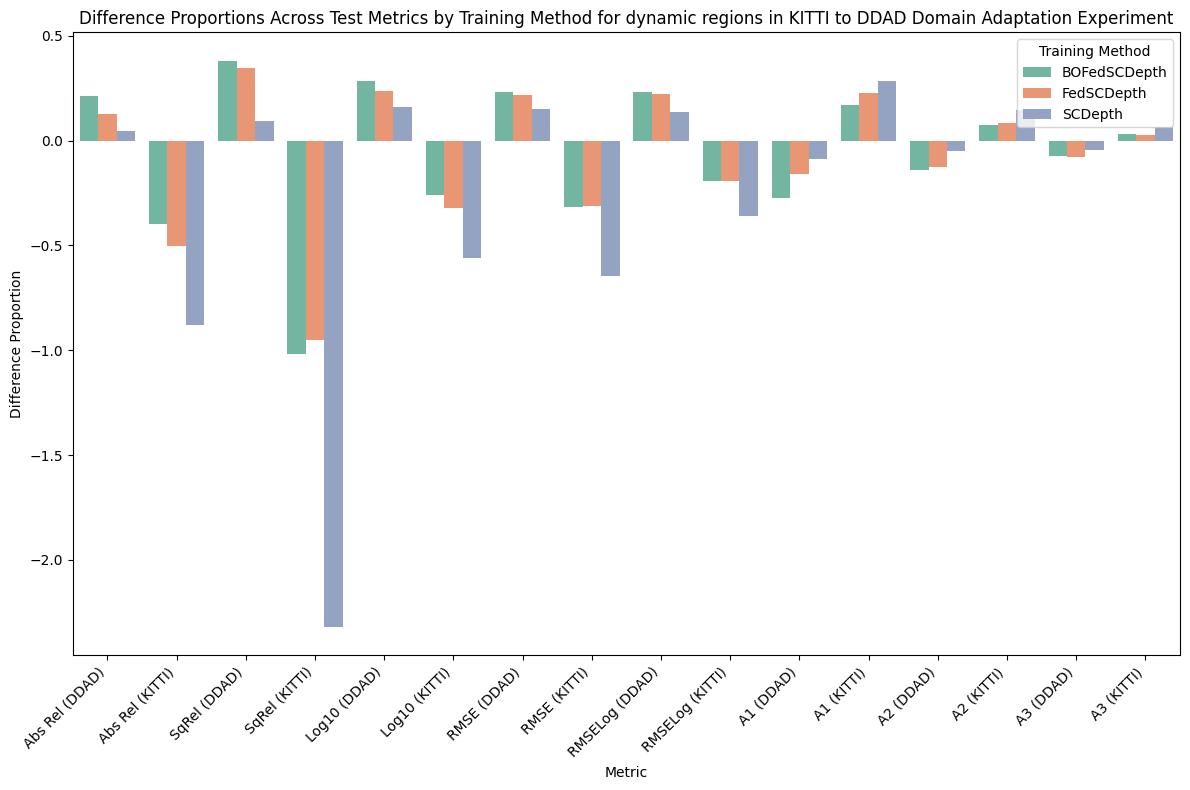

,training_method,Abs Rel (DDAD),Abs Rel (KITTI),SqRel (DDAD),SqRel (KITTI),Log10 (DDAD),Log10 (KITTI),RMSE (DDAD),RMSE (KITTI),RMSELog (DDAD),RMSELog (KITTI),A1 (DDAD),A1 (KITTI),A2 (DDAD),A2 (KITTI),A3 (DDAD),A3 (KITTI)
0,BOFedSCDepth,0.392713,-0.624000,0.423827,-1.755470,0.409836,-0.400000,0.256317,-0.473618,0.346535,-0.363158,-0.376307,0.132075,-0.129950,0.052138,-0.063404,0.017259
1,FedSCDepth,0.365854,-0.825000,0.414364,-1.938320,0.390244,-0.596154,0.249754,-0.521106,0.342995,-0.440860,-0.352332,0.178114,-0.122525,0.060354,-0.066069,0.019289
2,SCDepth,0.360360,-1.295652,0.382201,-4.299191,0.422018,-0.900000,0.285599,-1.086279,0.346995,-0.715847,-0.299363,0.231651,-0.100950,0.107996,-0.055616,0.045685


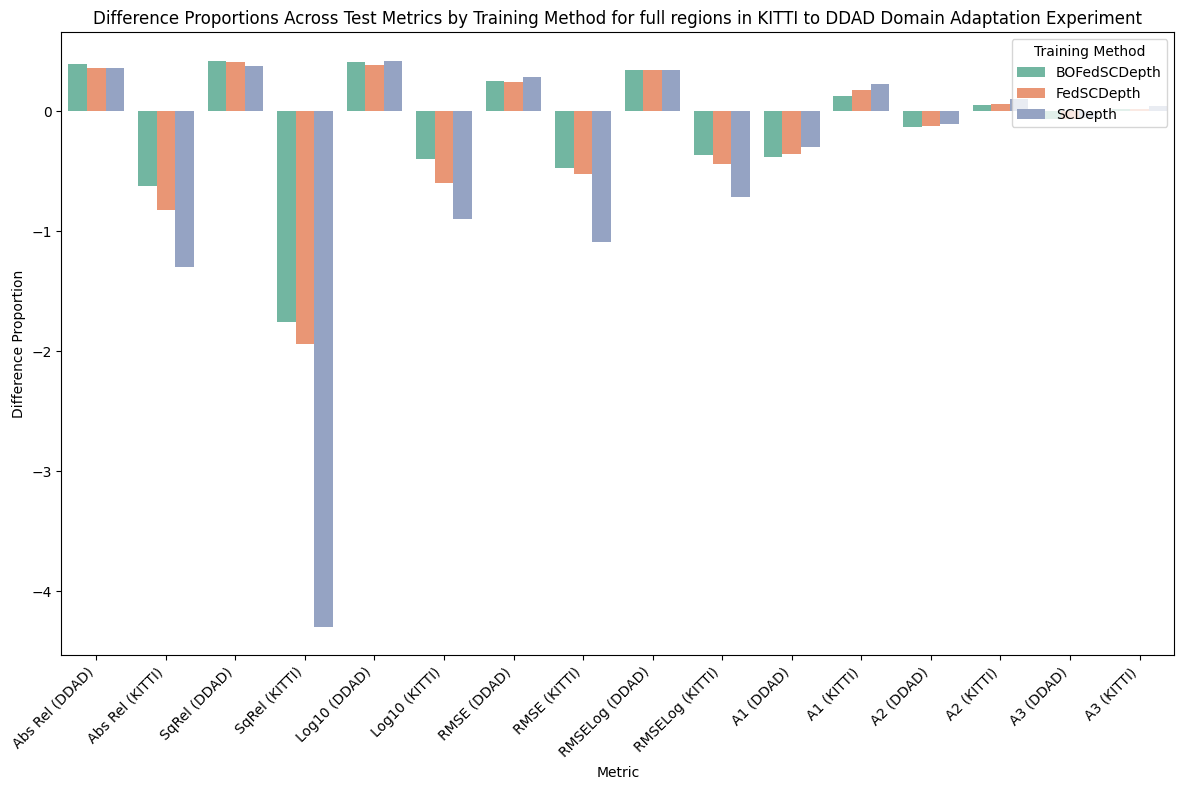

,training_method,Abs Rel (DDAD),Abs Rel (KITTI),SqRel (DDAD),SqRel (KITTI),Log10 (DDAD),Log10 (KITTI),RMSE (DDAD),RMSE (KITTI),RMSELog (DDAD),RMSELog (KITTI),A1 (DDAD),A1 (KITTI),A2 (DDAD),A2 (KITTI),A3 (DDAD),A3 (KITTI)
0,BOFedSCDepth,0.414343,-0.719298,0.436854,-2.185410,0.427419,-0.480000,0.262488,-0.516622,0.365196,-0.455090,-0.401408,0.134793,-0.137157,0.053608,-0.068156,0.018163
1,FedSCDepth,0.394422,-0.944954,0.430890,-2.454976,0.420635,-0.702128,0.257116,-0.585199,0.362768,-0.571429,-0.388401,0.178815,-0.133750,0.060700,-0.073281,0.021169
2,SCDepth,0.384956,-1.471698,0.406269,-5.249216,0.441441,-1.021739,0.295770,-1.210994,0.372973,-0.905660,-0.327391,0.234763,-0.111377,0.113052,-0.061336,0.047427


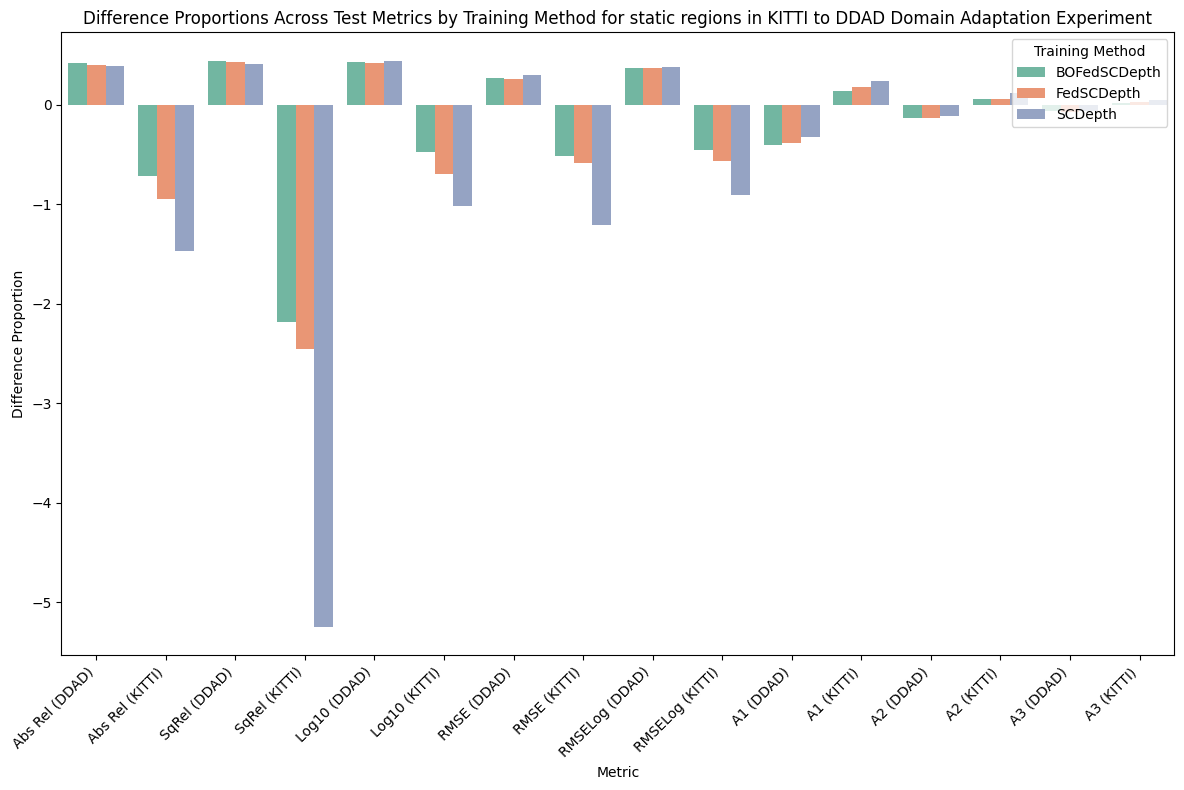

In [4]:
for source_train_dataset in result_change_df['source_train_dataset'].unique():
    for target_train_dataset in result_change_df['target_train_dataset'].unique():
        scenario_df = result_change_df[(result_change_df['source_train_dataset'] == source_train_dataset) & (result_change_df['target_train_dataset'] == target_train_dataset)]
        if len(scenario_df) == 0:
            continue # skip
        scenario_df = scenario_df.drop(columns=['source_train_dataset', 'target_train_dataset'])
        for region_type in scenario_df['test_region_type'].unique():
            kitti_to_ddad_by_region_type_df = scenario_df[scenario_df['test_region_type'] == region_type]
            kitti_to_ddad_by_region_type_df = kitti_to_ddad_by_region_type_df.drop(columns=['test_region_type'])
            kitti_to_ddad_by_region_type_df.columns = ['training_method', 'test_dataset', 'Abs Rel', 'SqRel', 'Log10', 'RMSE', 'RMSELog', 'A1', 'A2', 'A3']
            kitti_to_ddad_by_region_type_melted_df = pd.melt(kitti_to_ddad_by_region_type_df, id_vars=['training_method', 'test_dataset'], var_name='metric', value_name='value')
            pivoted_df = kitti_to_ddad_by_region_type_melted_df.pivot(index='training_method', columns=['test_dataset', 'metric'], values='value')
            pivoted_df.columns = [f"{col[1]} ({col[0]})" for col in pivoted_df.columns]
            pivoted_df = pivoted_df.reset_index()
            display(pivoted_df)
            plot_diff_prop(pivoted_df, region_type, source_train_dataset, target_train_dataset)